In [3]:
import pandas as pd

# Load the xsv file (assuming it's a CSV file for this example)
df = pd.read_csv('BankChurners.csv', delimiter=',')  # Adjust the delimiter if necessary

# Print the title of each column
for column in df.columns:
    print(column)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [4]:
num_samples = len(df)
print(num_samples)

10127


/home/rteam2/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


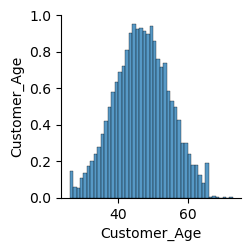

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific columns (change 'feature1', 'feature2', etc., to the names of your features)
selected_features = ['Customer_Age']
selected_df = df[selected_features]

# Create a pairplot
sns.pairplot(selected_df, height=2.5)

# Show the plot
plt.show()


In [6]:


# Check for NaN values
if df.isnull().values.any():
    print("There are NaN values in the dataset.")
else:
    print("No NaN values in the dataset.")



No NaN values in the dataset.


1-4

In [7]:
nan_info = df.isnull().sum()
print("Columns with NaN values:")
print(nan_info[nan_info > 0])


Columns with NaN values:
Series([], dtype: int64)


1-5

In [8]:
classes = df["Attrition_Flag"].unique()
print(classes)


['Existing Customer' 'Attrited Customer']


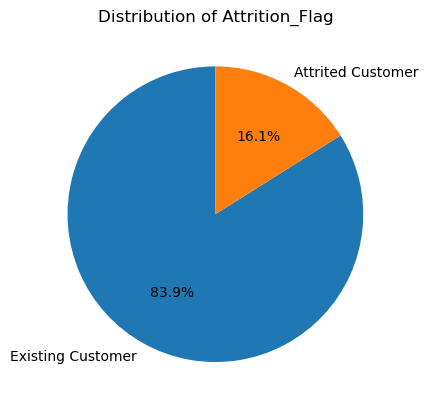

<Figure size 640x480 with 0 Axes>

In [9]:

data_counts = df["Attrition_Flag"].value_counts()
data_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Attrition_Flag")
plt.ylabel("")
plt.show()
plt.savefig("img/pie_photo")


In [10]:
print(df["Attrition_Flag"].value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the target variable y
y = df['Attrition_Flag']

# Define the feature variables X (excluding the target variable)
X = df.drop(columns=['Attrition_Flag'])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression())])

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       239
Existing Customer       1.00      1.00      1.00      1280

         accuracy                           1.00      1519
        macro avg       1.00      1.00      1.00      1519
     weighted avg       1.00      1.00      1.00      1519

Test Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       257
Existing Customer       1.00      1.00      1.00      1263

         accuracy                           1.00      1520
        macro avg       1.00      1.00      1.00      1520
     weighted avg       1.00      1.00      1.00      1520



In [12]:
columns_to_remove = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
X = X.drop(columns=columns_to_remove)

# Update the numerical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Update the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Update the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression())])

# Retrain the model
pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.75      0.57      0.65       239
Existing Customer       0.92      0.96      0.94      1280

         accuracy                           0.90      1519
        macro avg       0.84      0.77      0.80      1519
     weighted avg       0.90      0.90      0.90      1519

Test Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.80      0.53      0.64       257
Existing Customer       0.91      0.97      0.94      1263

         accuracy                           0.90      1520
        macro avg       0.85      0.75      0.79      1520
     weighted avg       0.89      0.90      0.89      1520



/home/rteam2/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Define the target variable y
y = df['Attrition_Flag']

# Define the feature variables X (excluding the target variable)
X = df.drop(columns=['Attrition_Flag'])

# Remove unnecessary columns
columns_to_remove = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
X = X.drop(columns=columns_to_remove)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess the training data before SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

# Train the model with balanced data
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# Validate the model
y_train_balanced_pred = model.predict(X_train_balanced)
y_val_balanced_pred = model.predict(X_val_preprocessed)

print("Training Classification Report (Balanced):")
print(classification_report(y_train_balanced, y_train_balanced_pred))
print("Validation Classification Report (Balanced):")
print(classification_report(y_val, y_val_balanced_pred))

# Confusion matrix for validation set
print("Validation Confusion Matrix (Balanced):")
print(confusion_matrix(y_val, y_val_balanced_pred))


/home/rteam2/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Classification Report (Balanced):
                   precision    recall  f1-score   support

Attrited Customer       0.86      0.87      0.86      5957
Existing Customer       0.87      0.85      0.86      5957

         accuracy                           0.86     11914
        macro avg       0.86      0.86      0.86     11914
     weighted avg       0.86      0.86      0.86     11914

Validation Classification Report (Balanced):
                   precision    recall  f1-score   support

Attrited Customer       0.52      0.84      0.64       239
Existing Customer       0.97      0.85      0.91      1280

         accuracy                           0.85      1519
        macro avg       0.74      0.85      0.77      1519
     weighted avg       0.90      0.85      0.87      1519

Validation Confusion Matrix (Balanced):
[[ 201   38]
 [ 186 1094]]
